In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Load the iris data set
iris = sns.load_dataset('iris')

print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Let's do a t-test first, to see if there is a significant difference between the sepal widths of two target groups:

In [2]:

setosa = iris[iris['species'] == 'setosa']['sepal_width']
versicolor = iris[iris['species'] == 'versicolor']['sepal_width']

# This is "Independent two sample dataset t-test": Tests if the means of the two independent groups are different.
# so this is not a paired t-test
t_stat, p_val = stats.ttest_ind(setosa, versicolor)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")


T-statistic: 9.454975848128596
P-value: 1.8452599454769255e-15


The very low p-value indicates that there is a significant difference in the values of the 2 groups (null hypothesis is false, namely the sepal width of the 2 species are not similar). Is this true for all categories? Try it yourself!

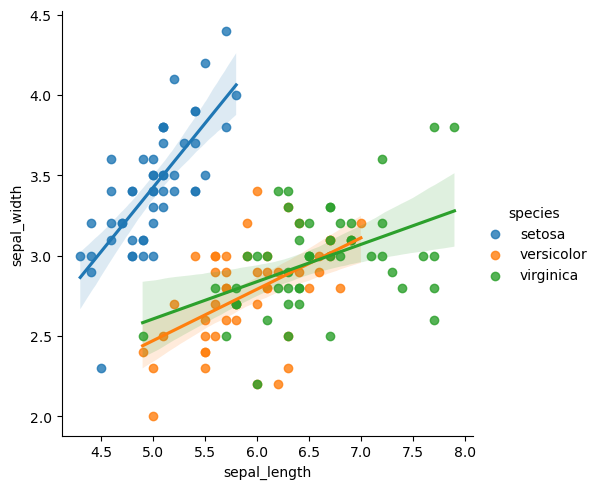

In [3]:
# Try it yourself here
sns.lmplot(x="sepal_length", y="sepal_width",hue = "species", data= iris)

In [4]:
virginica = iris[iris['species'] == 'virginica']['sepal_width']
versicolor = iris[iris['species'] == 'versicolor']['sepal_width']

t_stat, p_val = stats.ttest_ind(virginica, versicolor)
# ".ttest_ind()" defaults to give a null hypothesis that the population mean of the 2 groups (setosa, versicolor) are the same 
# Thus, if p <= 0.05, then the mean of the 2 groups are different (or the values of the 2 groups are significantly different)


print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

# samll p value (<0.05), null hypothesis is false 

T-statistic: 3.2057607502218186
P-value: 0.0018191004238894803


Next, let's compute the Chi-squared test:

In [5]:
# Convert 'sepal_width' to a categorical variable
iris['sepal_width_cat'] = pd.cut(iris['sepal_width'], bins=[0, 3, 3.5, 4])

# Create a contingency table
contingency_table = pd.crosstab(iris['species'], iris['sepal_width_cat'])

chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p_val}")

# again, as the p value is very small (< significance level), 
# the null hypothesis (2 categorical variable are independent) is rejected, meaning that
# the 2 categorical variables (sepal_width_cat and species) are somehow related

Chi-squared: 51.132288195334525
P-value: 2.0945619933052866e-10


We do see a statistical significance. Let's move on to an ANOVA test, to see if there is a difference between the means of all 3 groups

In [6]:
setosa = iris[iris['species'] == 'setosa']['sepal_width']
versicolor = iris[iris['species'] == 'versicolor']['sepal_width']
virginica = iris[iris['species'] == 'virginica']['sepal_width']

f_stat, p_val = stats.f_oneway(setosa, versicolor, virginica)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

# since the p value is close to 0, we know that the population means of the 3 groups are not equal
# Note: To know which 2 groups have different population means, use the pairwise t-test on all the pairs of the groups


F-statistic: 49.160040089612075
P-value: 4.492017133309115e-17


Now let's calculate Pearson's correlation between two continuous variables:

In [7]:
pearson_corr, p_val = stats.pearsonr(iris['sepal_length'], iris['sepal_width'])

print(f"Pearson's correlation: {pearson_corr}")
print(f"P-value: {p_val}")

# since the p-value is kind large (> 0.05), we failed to reject the null hypothesis, in which the null hypothesis is  
# "No linear relationship between the 2 numeric variables". (as the correlation value is also small, 
# we can believe that there is no linear relationship between sepal_length and sepal_width) 

Pearson's correlation: -0.11756978413300198
P-value: 0.15189826071144805


In [8]:
pearson_corr, p_val = stats.pearsonr(iris[iris['species']=='setosa']['sepal_length'], iris[iris['species']=='setosa']['sepal_width'])

print(f"Pearson's correlation: {pearson_corr}")
print(f"P-value: {p_val}")

Pearson's correlation: 0.7425466856651596
P-value: 6.709843017660548e-10


We can also calculate Pearson's correlation directly in Pandas.

In [9]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


##### The null hypothesis for Pearson Correlation is that there is NO linear relationship. We can see in this case that the correlation is a low value, and the p-value indicates an insignificant relationship (failed to reject the null hypothesis).

##### Let's try the Spearman's correlation (capture non-linear correlation)


In [10]:
spearman_corr, p_val = stats.spearmanr(iris['sepal_length'], iris['sepal_width'])
print(f"Spearman's correlation: {spearman_corr}")
print(f"P-value: {p_val}")

# The null hypothesis of Spearman Correlation test is that there is NO monotonic relationship between the 2 variables / groups
# Since the p-value is still small (< 0.05), we should reject the null hypothesis, meaning that
# there is non-linear relationship (monotonic association) between the 2 variables / groups


Spearman's correlation: -0.166777658283235
P-value: 0.04136799424884587


### Let's try a non-parametric test, Mann-Whitney, to compare means:

In [11]:
# This is like a 2 sample t-test, so the null hypothesis is that the 2 variables have similar distribution
# and the small p-value indicates that we should reject the null hypothesis, meaning that 
# the 2 variables have different population distributions

setosa = iris[iris['species'] == 'setosa']['sepal_width']
versicolor = iris[iris['species'] == 'versicolor']['sepal_width']

U_stat, p_val = stats.mannwhitneyu(setosa, versicolor)

print(f"U-statistic: {U_stat}")
print(f"P-value: {p_val}")


U-statistic: 2312.0
P-value: 2.143379728077519e-13


Let's try the Kruskal-Wallis test.

In [12]:
# Kruskal test is like ANOVA test (null hypothesis is that the distributions of multiple variables / groups are the same)
# A small p-value as shown below indicates that we should reject the null hypothesis, meaning that 
# there are at least 2 groups whose population distributions are different (or 2 population means are different)

setosa = iris[iris['species'] == 'setosa']['sepal_width']
versicolor = iris[iris['species'] == 'versicolor']['sepal_width']
virginica = iris[iris['species'] == 'virginica']['sepal_width']

H, pval = stats.kruskal(setosa, versicolor, virginica)

print('The test statistic:', H)
print('The p-value of the test:', pval)

The test statistic: 63.571146104163795
The p-value of the test: 1.5692820940316782e-14


In [2]:
! conda install -c conda-forge scikit-optimize

- 